In [38]:
"""
Script to preprocess and prepare the dataset used for training. Convert individual videos to npy files.
"""
import time
import cv2
import numpy as np
import os, glob
import xlrd
import re, random
import shutil
from datetime import datetime

In [39]:
# Define global variables

root_dir = "C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/"
video_folder = os.path.join(root_dir, "raw_data")  # Folder of MP4 Data
label_folder = os.path.join(root_dir, "data_annotation") # Folder of sensor data used for labelling 
output_folder = r"\MAA" 

# Mapping between sensor and video files
dates = [f for f in os.listdir(video_folder)]
video_paths, label_paths = [os.path.join(video_folder, d) for d in dates], [os.path.join(label_folder, d) for d in dates]

# # Make a list of labels sort by date
# label/video paths differentiable by dates
# i-th folder denotes a certain date
for i in range(len(label_paths)):
    labels = glob.glob(label_paths[i] + "/*.mat")
    videos = glob.glob(video_paths[i] + "/*.mp4")
    labels = sorted(labels, key=lambda x: datetime.strptime(x[-12:-4], "%H-%M-%S"))
    
#     print('\nFinished one-to-one mapping for {}'.format(dates[i]))

    for x,y in zip(videos, labels):
        print(x)
        print(y)
        print('\n')


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-07-03\GOPR3403.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-07-03\idapt503_sub251_UP_13-01-41.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-07-03\GOPR3404.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-07-03\idapt503_sub251_DP_13-01-55.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-07-03\GOPR3405.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-07-03\idapt503_sub251_UP_13-02-29.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-wit

C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-08-12\GOPR4351.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-08-12\idapt507_sub249_UP_10-04-47.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-08-12\GOPR4352.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-08-12\idapt507_sub249_DP_10-05-01.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-08-12\GOPR4353.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-08-12\idapt507_sub249_UP_10-05-57.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-wit



C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-08-13\GOPR4827.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-08-13\idapt507_sub244_UP_15-19-26.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-08-13\GOPR4828.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-08-13\idapt507_sub244_DP_15-19-42.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-08-13\GOPR4829.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-08-13\idapt507_sub244_UP_15-20-09.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-w

C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-09-11\idapt516_sub237_DP_15-38-43.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-09-17\GOPR5963.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-09-17\idapt518_sub253_UP_09-56-30.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-09-17\GOPR5964.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-09-17\idapt518_sub253_UP_09-56-45.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-09-17\GOPR5965.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-wit

C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-09-19\GOPR6331.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-09-19\idapt519_sub265_UP_10-27-31.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-09-19\GOPR6332.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-09-19\idapt519_sub265_DP_10-27-47.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-09-19\GOPR6333.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-09-19\idapt519_sub265_UF_10-28-22.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-wit


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-12-04\GOPR1288.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-12-04\idapt524_sub245_DP_11-26-27.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-12-04\GOPR1289.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-12-04\idapt524_sub245_UP_11-27-01.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/raw_data\2019-12-04\GOPR1290.MP4
C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-with-CNNs-and-Optical-Flow/data_annotation\2019-12-04\idapt524_sub245_DP_11-27-15.mat


C:/Users/kentw/OneDrive - University of Toronto/PycharmProjects/Fall-Detection-wi

In [40]:
# Data listed in Excel sheet 

loc = (root_dir + "MAA_data_category.xlsx") 
wb = xlrd.open_workbook(loc) 

sheet = wb.sheet_by_index(0) 
Pass = set([sheet.cell_value(i, 0) for i in range(sheet.nrows)])

sheet = wb.sheet_by_index(1) 
Hazardous_slips = set([sheet.cell_value(i, 0) for i in range(sheet.nrows)])

sheet = wb.sheet_by_index(2) 
Normal_slips = set([sheet.cell_value(i, 0) for i in range(sheet.nrows)])

sheet = wb.sheet_by_index(3) 
Small_slips = set([sheet.cell_value(i, 0) for i in range(sheet.nrows)])


In [41]:
# Inspection/review of data 
# Choose some videos to watch over 

def data_inspection(data_set=None, date=None, outcome=None):  
    # Use keyboard to add trials into the unqualified set
    unqualified = set()
    for i in range(len(label_paths)):
        labels = glob.glob(label_paths[i] + "/*.mat")
        videos = glob.glob(video_paths[i] + "/*.mp4")
        labels = sorted(labels, key=lambda x: datetime.strptime(x[-12:-4], "%H-%M-%S"))
        
        # date restriction
        if date:
            if dates[i] != date: continue
        
        for index, label in enumerate(labels) :
            filename = label.split('\\')[-1].rstrip('.mat') 
            direction = filename.split('_')[2][0]
            result = filename.split('_')[2][1]
            
            # Category restriction
            if data_set:
                if filename not in data_set: continue 
                    
            # Result restriction
            if outcome:
                if result != outcome: continue

            # print(filename)
            cap = cv2.VideoCapture(videos[index])
            length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            position = length // 64

            while 1:
                ret, frame = cap.read()
                if not ret: break

                k = cv2.waitKey(10) & 0xff
                if k == 27:  # Esc button
                    cv2.destroyAllWindows()
                    break
                elif k == ord(' '): # White space button
                    time.sleep(1)
                    unqualified.add(filename)

                current_frame = int(cap.get(1)) - 1
                if current_frame % position == 0 and (current_frame // position) < 64:  
                    frame = cv2.resize(frame, (512, 512))
                    # if direction == 'U':
                    #     frame = cv2.flip(frame, 1)
                    cv2.imshow("Hello world", frame)

            cap.release()
            cv2.destroyAllWindows()

    print(unqualified)
    return unqualified


In [42]:
# Make a list of labels sort by date
# label/video paths differentiable by dates
# i-th folder denotes a certain date

def data_generation(data_set):
    for i in range(len(label_paths)):
        labels = glob.glob(label_paths[i] + "/*.mat")
        videos = glob.glob(video_paths[i] + "/*.mp4")
        labels = sorted(labels, key=lambda x: datetime.strptime(x[-12:-4], "%H-%M-%S"))

        for index, label in enumerate(labels) :
            filename = label.split('\\')[-1].rstrip('.mat')
            result = filename.split('_')[2][1]
            direction = filename.split('_')[2][0]

            # Remove outliers or add your constraints
            if result == 'U' or filename not in data_set:
                continue

            # print(filename)

            cap = cv2.VideoCapture(videos[index])
            length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            position = length // 64
            res = np.zeros([64, 224, 224, 3]) # Initialize an empty numpy array

            while 1:
                ret, frame = cap.read()
                if not ret: break

                k = cv2.waitKey(0) & 0xff
                if k == 27:  # Esc button
                    cv2.destroyAllWindows()
                    break

                current_frame = int(cap.get(1)) - 1

                if current_frame % position == 0 and (current_frame // position) < 64:
                    # Some image processing 
                    # load the image and show it           
                    frame = frame[:, :]
                    frame = cv2.resize(frame, (224, 224))
                    # if direction == 'U':
                    #     frame = cv2.flip(frame, 1)
                    im = np.array(frame)
                    res[current_frame // position, :, :, :] = im

            # Save into npy. file
            file = os.path.join(root_dir + output_folder, filename)
            # print(files)
            np.save(file, res)

            cap.release()
            cv2.destroyAllWindows()

    print("\nDONE.")
    

In [43]:
# Originally used for extra samples of passes
# Found 60 manually, but want to find 120 more

def data_selection(target_size, existing_set):
    labels = glob.glob(label_folder + "/*/*.mat" , recursive = True)
    r = re.compile(".*idapt\d{3}_sub\d{3}_[U|D]P_\d{2}-\d{2}-\d{2}.mat")
    newlist = list(filter(r.match, labels)) # Read Note
    newlist = [label.split('\\')[-1].rstrip('.mat') for label in newlist]
    random.shuffle(newlist)

    result = existing_set.copy()
    while len(result) != target_size:
        result.add(newlist.pop())
    return result


In [52]:
# Categorize data into different folders for the experiments requested by Atena

def data_categorization():
    Hazardous_dir = os.path.join(root_dir + output_folder, "Hazardous_slips") 
    Normal_dir = os.path.join(root_dir + output_folder, "Normal_slips") 
    Small_dir = os.path.join(root_dir + output_folder, "Small_slips") 
    
    Pass_split1_dir = os.path.join(root_dir + output_folder, "Pass_split1") 
    Pass_split2_dir = os.path.join(root_dir + output_folder, "Pass_split2") 
    Pass_split3_dir = os.path.join(root_dir + output_folder, "Pass_split3") 

    data_dir = {
        Hazardous_dir,
        Normal_dir,
        Small_dir,
        Pass_split1_dir,
        Pass_split2_dir,
        Pass_split3_dir,
    }
    
    for f in data_dir:
        if not os.path.exists(f):
            os.makedirs(f)
            
    # Python program to explain shutil.move() method 
    source = root_dir + output_folder  # Source path 
#     for f in Hazardous_slips:
#         f = os.path.join(source, f + '.npy')
#         destination =  Hazardous_dir # Destination path 
#         shutil.move(f, destination)
#     for f in Small_slips:
#         f = os.path.join(source, f + '.npy')
#         destination =  Small_dir # Destination path 
#         shutil.move(f, destination)
#     for f in Normal_slips:
#         f = os.path.join(source, f + '.npy')
#         destination =  Normal_dir # Destination path 
#         shutil.move(f, destination)
    
    # Pass
    global Pass
    slen = len(Pass) // 3 # we need 3 subsets
    set1 = set(random.sample(Pass, slen)) # 1st random subset
    Pass -= set1
    set2 = set(random.sample(Pass, slen)) # 2nd random subset
    Pass -= set2
    set3 = Pass # 3rd random subset
    for f in set1:
        f = os.path.join(source, f + '.npy')
        destination =  Pass_split1_dir # Destination path 
        shutil.move(f, destination)
    for f in set2:
        f = os.path.join(source, f + '.npy')
        destination =  Pass_split2_dir # Destination path 
        shutil.move(f, destination)
    for f in set3:
        f = os.path.join(source, f + '.npy')
        destination =  Pass_split3_dir # Destination path 
        shutil.move(f, destination)
    

In [53]:
if __name__ == '__main__':
    # Check mutual exclusivity
    print(Hazardous_slips.intersection(Normal_slips))
    print(Hazardous_slips.intersection(Small_slips))
    print(Small_slips.intersection(Normal_slips))

    data_set = [Pass, Hazardous_slips, Normal_slips, Small_slips] 
    data_set = set().union(*data_set)
   
    # 不合格： idapt504_sub249_DF_13-36-17， idapt506_sub249_DF_10-06-05，idapt507_sub244_DF_15-52-56
    
    # data_generation(data_set)
    # data_categorization()


set()
set()
set()


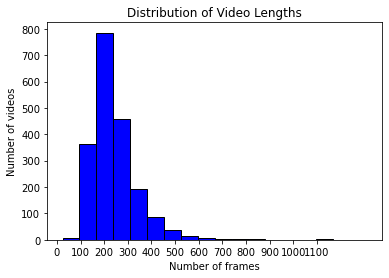

In [6]:
# matplotlib histogram
import matplotlib.pyplot as plt

# Find out the length of the longest video
videos = glob.glob(video_folder + "/*/*.mp4" , recursive = True)
list = []

# longest: the number of frames in the longest video
# acc: number of videos satisfying the citeria
# list: the list of videos corresponding to acc

for f in videos:
    cap = cv2.VideoCapture(f)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    list.append(length)

plt.hist(list, color = 'blue', edgecolor = 'black',
         bins = int(180/10))

# third_quantile = np.percentile(list, 75)
# print('Third Quantile：{}'.format(third_quantile))

# Add labels
plt.title('Distribution of Video Lengths')
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
x = range(0, 1200, 100)
plt.xticks(x)
plt.show()